In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as plt


In [2]:
data=pd.read_csv("D:\kaggle\Rain prediction\weatherHistory.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Formatted Date          96453 non-null  object 
 1   Summary                 96453 non-null  object 
 2   Precip Type             95936 non-null  object 
 3   Temperature (C)         96453 non-null  float64
 4   Apparent                96453 non-null  float64
 5   Humidity                96453 non-null  float64
 6   Wind Speed (km/h)       96453 non-null  float64
 7   Wind Bearing (degrees)  96453 non-null  int64  
 8   Visibility (km)         96453 non-null  float64
 9   Loud Cover              96453 non-null  int64  
 10  Pressure (millibars)    96453 non-null  float64
 11  Daily Summary           96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [3]:
print(data.isnull)

<bound method DataFrame.isnull of                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)   Apparent  Humidity  Wind Speed (km/h)  \
0             9.472222   7.388889      0.89            14.1197   
1             9.355556   7.22

In [4]:
data.drop(['Visibility (km)','Daily Summary','Formatted Date','Summary','Apparent','Wind Bearing (degrees)','Wind Speed (km/h)','Loud Cover','Pressure (millibars)'], axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Precip Type      95936 non-null  object 
 1   Temperature (C)  96453 non-null  float64
 2   Humidity         96453 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.2+ MB


<Axes: xlabel='Precip Type', ylabel='count'>

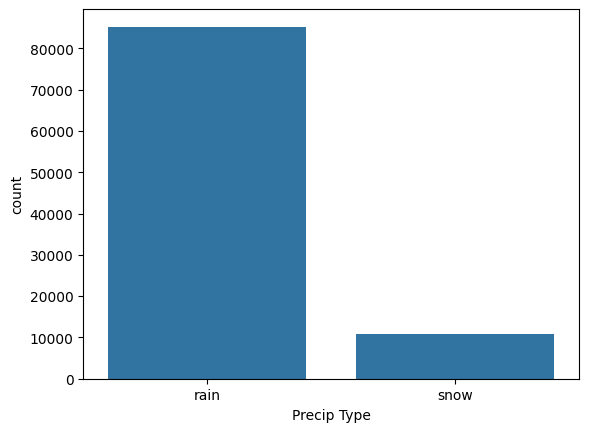

In [6]:
data.drop(data.index[data['Precip Type'] =='null'], inplace=True)
sns.countplot(data=data, x="Precip Type")

In [7]:
data.dropna(inplace=True)
mapping = {'snow': 0, 'rain': 1}
data['labels'] = data['Precip Type'].map(mapping).astype(int)
data.drop('Precip Type',axis=1,inplace=True)
data.info

<bound method DataFrame.info of        Temperature (C)  Humidity  labels
0             9.472222      0.89       1
1             9.355556      0.86       1
2             9.377778      0.89       1
3             8.288889      0.83       1
4             8.755556      0.83       1
...                ...       ...     ...
96448        26.016667      0.43       1
96449        24.583333      0.48       1
96450        22.038889      0.56       1
96451        21.522222      0.60       1
96452        20.438889      0.61       1

[95936 rows x 3 columns]>

<Axes: xlabel='labels', ylabel='count'>

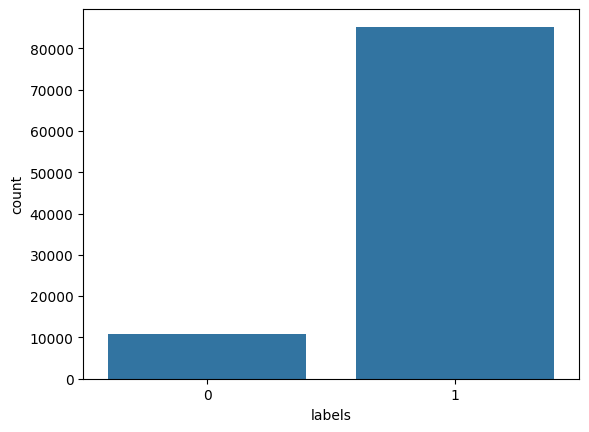

In [8]:
sns.countplot(data=data, x="labels")

In [9]:
data

,Temperature (C),Humidity,labels
0,9.472222,0.89,1
1,9.355556,0.86,1
2,9.377778,0.89,1
3,8.288889,0.83,1
4,8.755556,0.83,1
...,...,...,...
96448,26.016667,0.43,1
96449,24.583333,0.48,1
96450,22.038889,0.56,1
96451,21.522222,0.60,1


In [10]:
features=data.drop('labels',axis=1)
labels=data['labels']
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [11]:
#Define the model
  


model = keras.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=(2,)),  
  keras.layers.Dense(1, activation="sigmoid")  
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [12]:


# Training
model.fit(x_train,y_train, epochs=10, batch_size=32)




Epoch 1/10
1799/1799 [==============================] - 6s 2ms/step - loss: 0.0875 - accuracy: 0.9751
Epoch 2/10
1799/1799 [==============================] - 4s 2ms/step - loss: 0.0146 - accuracy: 0.9971
Epoch 3/10
1799/1799 [==============================] - 5s 3ms/step - loss: 0.0095 - accuracy: 0.9979
Epoch 4/10
1799/1799 [==============================] - 5s 3ms/step - loss: 0.0070 - accuracy: 0.9986
Epoch 5/10
1799/1799 [==============================] - 4s 2ms/step - loss: 0.0055 - accuracy: 0.9989
Epoch 6/10
1799/1799 [==============================] - 5s 3ms/step - loss: 0.0044 - accuracy: 0.9991
Epoch 7/10
1799/1799 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 8/10
1799/1799 [==============================] - 5s 3ms/step - loss: 0.0032 - accuracy: 0.9993
Epoch 9/10
1799/1799 [==============================] - 4s 2ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 10/10
1799/1799 [==============================] - 5s 3ms/step - loss: 0.002

In [13]:
test_loss, test_acc = model.evaluate(x_val,y_val)
print("Test Accuracy:", test_acc)



predictions = model.predict(x_test)




for prediction in predictions:
  if prediction > 0.5:
    print("Rain is likely")
  else:
    print("Snow is likely")

600/600 [==============================] - 2s 2ms/step - loss: 0.0025 - accuracy: 0.9995
Test Accuracy: 0.999478816986084
600/600 [==============================] - 1s 2ms/step
Snow is likely
Rain is likely
Rain is likely
Rain is likely
Snow is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Snow is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Snow is likely
Snow is likely
Rain is likely
Snow is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Snow is likely
Rain is likely
Rain is likely
Rain is likely
Snow is likel

In [14]:
predict=pd.DataFrame(predictions)

In [15]:
import numpy as np

y_predicted = np.where(predict > 0.5, 1, 0)

In [16]:
y_predicted = np.where(predict > 0.5, 1, 0)  # Convert predictions to binary values

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)  # Use y_predicted instead of predict

cm

array([[ 2188,     0],
       [    5, 16994]], dtype=int64)

<Axes: >

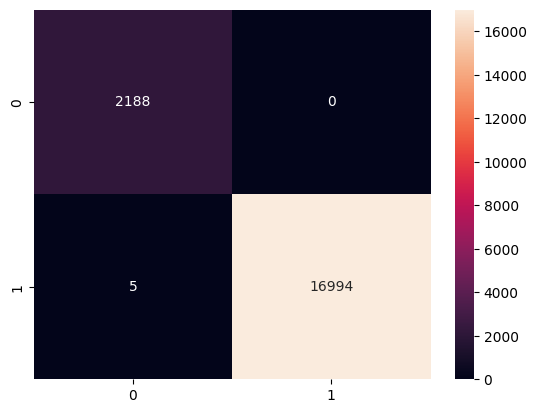

In [17]:
from matplotlib import pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')

In [18]:
model.save('D:\\kaggle\\Rain prediction\\1rain_fall.h5')